In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def extract_segments(img, pad=10) :
    '''function to extract individual chacters and digits from an image
    input paramterts
    img : input image (numpy array)
    pad : padding window size around segments (int)
    Returns
    out : list of each segments (starting from leftmost digit)'''
    
    import cv2
    # thresholding the image
    ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    
    # Negative tranform gray levels (background becomes black) 
    thresh1 = thresh1 - 1
    thresh1[thresh1 == 254] = 0
    thresh1[thresh1 == - 1 ] = 255
    
    # connected component labelling 
    output = cv2.connectedComponentsWithStats(thresh1, 4)
    final = []
    temp1 = np.sort( output[2][:,0] )
    
    for i in range(1,output[0]):
        temp2 = output[2]
        cord = np.squeeze( temp2[temp2[:,0] == temp1[i]] )
        num = np.pad( thresh1[ cord[1]:cord[1]+cord[3], cord[0]:cord[0]+cord[2] ], pad,'constant')
        final.append(num)
    return final

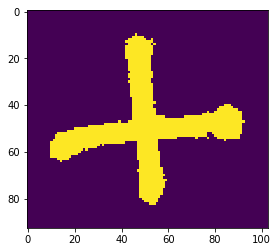

In [5]:
# reading the image
img = cv2.imread('/Users/josejoy/Desktop/ECE 271B Stat Learning /project/eq1.jpg',0)
segments= extract_segments(img, 10)
plt.imshow(segments[1])
plt.show()

In [11]:
def rescale_segment( segment, size = [28,28] ):
    '''function for resizing (scaling down) images
    input parameters
    seg : the segment of image (np.array)
    size : out size (list of two integers)
    output 
    scaled down image'''
    m,n = segment.shape
    idx1 = list(range(0,m, (m)//(size[0]) ) )
    idx2 = list(range(0,n, n//(size[1]) )) 
    out = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            out[i,j] = segment[ idx1[i] + (m%size[0])//2, idx2[j] + (n%size[0])//2]
    kernel = np.ones( [2,2])
    return out